In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


X = np.array([
    [6,3],[11,15],[17,12],[24,10],[20,25],[22,30],
    [85,70],[71,81],[60,79],[56,52],[81,91],[80,81]])

plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
#모델학습(KMeans)
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2)
model.fit(X)

print(model.cluster_centers_)

In [ ]:
print(model.n_iter_)

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(16.7, 15.8, marker="*")
plt.scatter(72.2, 75.7, marker="^")
plt.show()

In [ ]:
print(model.predict([[20, 19]]))

In [ ]:
print(model.predict([[65, 68]]))

In [ ]:
print(model.labels_)
plt.scatter(X[:,0], X[:,1], c = model.labels_, cmap='rainbow')
plt.show()

In [3]:
import os
os.chdir("/content/drive/MyDrive/ML/Data")

In [ ]:
import pandas as pd
csv_data = pd.read_csv("k-means_data.csv")

In [ ]:
csv_data.head()

In [ ]:
x = csv_data[['x']]
y = csv_data['y']

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
model2 = KMeans(n_clusters=2, n_init='auto')
model2.fit(x)

print(model2.cluster_centers_)

In [ ]:
print(model2.n_iter_)

In [ ]:
print(model2.labels_)
plt.scatter(x, y, c = model2.labels_, cmap='rainbow')
plt.show()

In [ ]:
inertia = []
for i in range(1, 6):
    km = KMeans(n_clusters=i, n_init = 'auto', random_state=42)
    km.fit(x)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia)
plt.title('Elbow Method for Optimal i')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [ ]:
model2 = KMeans(n_clusters=3, n_init='auto')
model2.fit(x)
print(model2.cluster_centers_)

In [ ]:
print(model2.labels_)
plt.scatter(x, y, c = model2.labels_, cmap='rainbow')
plt.show()

In [ ]:
import pandas as pd
csv_data = pd.read_csv("score.csv")
csv_data.head()

In [ ]:
score_data = csv_data.drop('학번', axis=1)
score_data.head()

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(score_data)

In [ ]:
model.n_iter_

In [ ]:
print(model.cluster_centers_)

In [ ]:
print(model.labels_)

In [ ]:
import matplotlib.pyplot as plt

inertia = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, n_init = 'auto', random_state=42)
    kmeans.fit(score_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia)
plt.title('Elbow Method for Optimal i')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [4]:
import pandas as pd
csv_data = pd.read_csv('iris.csv')
iris_data = csv_data.drop('Name', axis=1)

In [5]:
from sklearn.cluster import KMeans
model3 = KMeans(n_clusters=3, n_init='auto', random_state=42)
model3.fit(iris_data)
print(model3.labels_)
print(model3.cluster_centers_)
print(model3.n_iter_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
12


In [6]:
iris_data['target'] = csv_data.Name
iris_data['cluster'] = model3.labels_
iris_result = iris_data.groupby(['target','cluster'])['SepalLength'].count()
print(iris_result)

target           cluster
Iris-setosa      1          50
Iris-versicolor  0           3
                 2          47
Iris-virginica   0          36
                 2          14
Name: SepalLength, dtype: int64


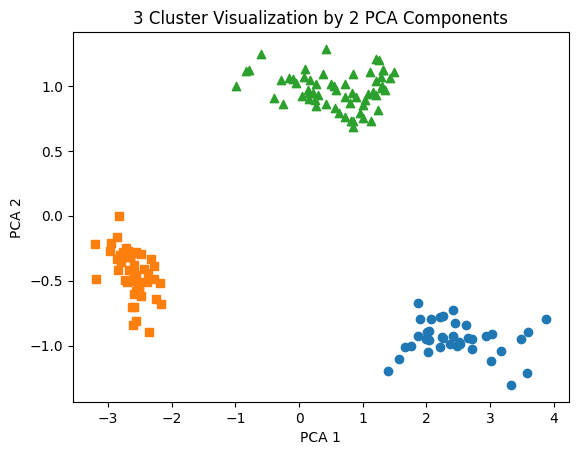

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

iris_data2 = iris_data.drop('target', axis=1)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_data2.values)


iris_data2['pca_x'] = pca_transformed[:,0]
iris_data2['pca_y'] = pca_transformed[:,1]
#print(iris_data2)

maker0_ind = iris_data2[iris_data2['cluster']==0].index
maker1_ind = iris_data2[iris_data2['cluster']==1].index
maker2_ind = iris_data2[iris_data2['cluster']==2].index

plt.scatter(x=iris_data2.loc[maker0_ind,'pca_x'], y=iris_data2.loc[maker0_ind, 'pca_y'], marker='o')
plt.scatter(x=iris_data2.loc[maker1_ind,'pca_x'], y=iris_data2.loc[maker1_ind, 'pca_y'], marker='s')
plt.scatter(x=iris_data2.loc[maker2_ind,'pca_x'], y=iris_data2.loc[maker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Cluster Visualization by 2 PCA Components')
plt.show()